In dieser Aufgabe möchten wir untersuchen, wie sich die Wahl der Trainingsdatengröße auswirkt.

### Teilaufgabe 1
Betrachten Sie den sklearn Diabetes Datensatz. Führen Sie einen Split in Trainings- und Validierungsdaten durch,  
so dass die ersten `k` Samples in den Trainings- und die nachfolgenden Samples in den Validierungsdaten landen.  
Variieren Sie im folgenden die Variable `k` zwischen 10 und 432 in 10er-Schritten.

In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

X,y = load_diabetes(as_frame=True, return_X_y=True)
k = [ step for step in range(10, 432, 10)]
def split_data(X, y, train_size=10, random_state=42):
	X_rows = len(X.index)
	X_train, X_validation, y_train, y_validation = train_test_split(X, y, random_state=random_state, train_size=train_size/X_rows)
	return {
		"X_train": X_train,
		"X_validation": X_validation,
		"y_train": y_train,
		"y_validation": y_validation,
	}

X,y = load_diabetes(as_frame=True, return_X_y=True)
samples = { test_size: split_data(X, y, test_size)  for test_size in k}
samples

{10: {'X_train':           age       sex       bmi        bp        s1        s2        s3  \
  121  0.063504 -0.044642  0.017506  0.021872  0.008063  0.021546 -0.036038   
  441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   
  20  -0.049105 -0.044642 -0.056863 -0.043542 -0.045599 -0.043276  0.000779   
  188  0.005383 -0.044642 -0.002973  0.049415  0.074108  0.070710  0.044958   
  71  -0.001882 -0.044642  0.033673  0.125158  0.024574  0.026243 -0.010266   
  106 -0.096328 -0.044642 -0.076264 -0.043542 -0.045599 -0.034821  0.008142   
  270  0.005383  0.050680  0.030440  0.083844 -0.037344 -0.047347  0.015505   
  348  0.030811 -0.044642 -0.020218 -0.005670 -0.004321 -0.029497  0.078093   
  435 -0.012780 -0.044642 -0.023451 -0.040099 -0.016704  0.004636 -0.017629   
  102 -0.092695 -0.044642  0.028284 -0.015999  0.036958  0.024991  0.056003   
  
             s4        s5        s6  
  121  0.034309  0.019907  0.011349  
  441 -0.039493 -0.004222  0.003064  

### Teilaufgabe 2
Trainieren Sie für jeden Wert von `k` einen `sklearn.ensemble.RandomForestRegressor` (Hyperparameter `max_features=5`, `max_depth=5` und `n_estimators=100`) und notieren Sie die R²-Scores auf Trainings- und Validierungsdaten.  
Zeichnen Sie Validierungskurven, in denen der Parameter `k` auf der x-Achse aufgetragen wird.

<Axes: title={'center': 'R^2 Score vs. Sample Size'}, xlabel='Sample Size', ylabel='R^2 Score'>

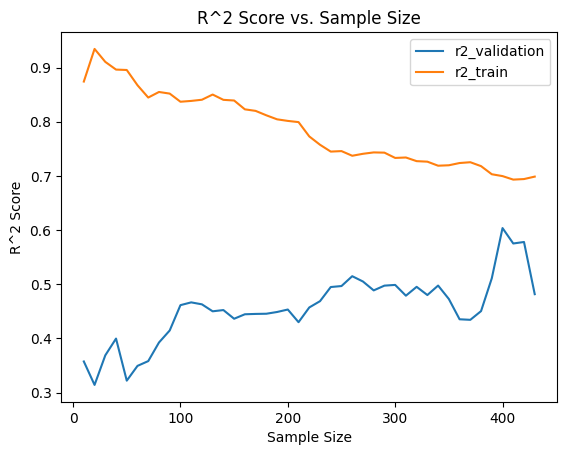

In [48]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

scores = []
for test_size, sample in samples.items():
	X_train = sample["X_train"]
	X_validation = sample["X_validation"]
	y_train = sample["y_train"]
	y_validation = sample["y_validation"]

	# Fit the model
	model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=5, max_features=5)
	model.fit(X_train, y_train)

	# Make predictions
	predictions_validation = model.predict(X_validation)
	predictions_train = model.predict(X_train)

	# Calculate R^2 score
	r2_validation = r2_score(y_validation, predictions_validation)
	r2_train = r2_score(y_train, predictions_train)
	scores.append({
		"k": test_size,
		"r2_validation": r2_validation,
		"r2_train": r2_train,
	})

scores = pd.DataFrame(scores)
scores.plot(x="k", y=["r2_validation", "r2_train"], title="R^2 Score vs. Sample Size", xlabel="Sample Size", ylabel="R^2 Score")

### Teilaufgabe 3
Erheben Sie nun zusätzlich für jedes `k` einen Vektor, dessen i.ter Eintrag die Standardabweichung der Vorhersagen (der Bäume des Random Forests) für Patient `i` enthält.  
Wenden Sie den Mittelwert an, um diesen Standardabweichungs-Vektor auf eine Zahl zu reduzieren.  
Für jedes `k` erhalten Sie eine solche Zahl.  
Visualisieren Sie wieder die entsprechenden Kurven (als Funktion von `k`) für Trainings- und Validierungsdaten und interpretieren Sie die Kurven.  
Tipp: Verwenden Sie `pd.DataFrame ( [m.predict(X_train.values) for m in rf.estimators_] )`, um Zugriff auf die nicht-gemittelten Vorhersagen der einzelnen Bäume zu erhalten.

<Axes: title={'center': 'Meaned standard deviation vs. Sample Size'}, xlabel='Sample Size', ylabel='Meaned standard deviation'>

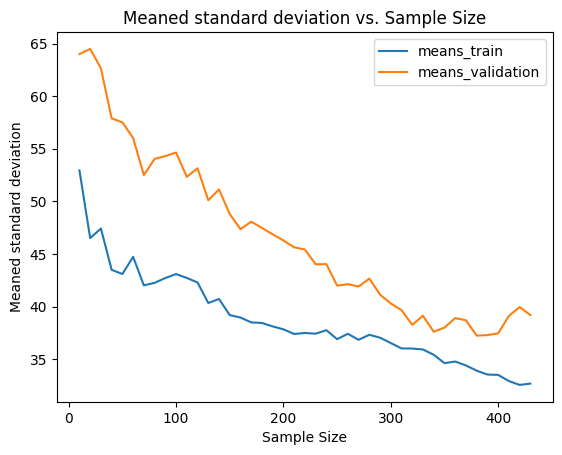

In [67]:
meaned_stds = []
for test_size, sample in samples.items():
	X_train = sample["X_train"]
	X_validation = sample["X_validation"]
	y_train = sample["y_train"]
	y_validation = sample["y_validation"]

	# Fit the model
	model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=5, max_features=5)
	model.fit(X_train, y_train)


	# Make predictions for single samples
	# columns are patients, rows are trees
	single_preds_train = pd.DataFrame ( [m.predict(X_train.values) for m in model.estimators_] )
	stds_train = single_preds_train.std(axis=0, )
	means_train = stds_train.mean()

	single_preds_validation = pd.DataFrame ( [m.predict(X_validation.values) for m in model.estimators_] )
	stds_validation = single_preds_validation.std(axis=0, )
	means_validation = stds_validation.mean()

	meaned_stds.append({
		"k": test_size,
		"means_train": means_train,
		"means_validation": means_validation,
	})


meaned_stds = pd.DataFrame(meaned_stds)
meaned_stds.plot(x="k", y=["means_train", "means_validation"], title="Meaned standard deviation vs. Sample Size", xlabel="Sample Size", ylabel="Meaned standard deviation")